In [1]:
import pandas as pd
import glob
import os

In [2]:
skill_groups = {
    "Problem-Solving, Critical Thinking, Analytical Reasoning": [
        "How would you rate your problem-solving skills?",
        "How would you rate your research skills?",
    ],
    "Adaptability, Continuous Learning, Creativity": [
        "How creative do you consider yourself?",
        "How much do unforeseen challenges and mistakes stress you out?",
        "How much do you fear failure",
        "How ready do you feel to enter the job market?",
    ],
    "Time Management": [
        "How well do you turn plans into action?",
        "How organized and detail-oriented are you?",
        "How well do you manage money?",
    ],
    "Communication, Teamwork, Collaboration, Community Engagement": [
        "How well would you say that you collaborate with others?",
        "How would you rate your communication skills?",
        "How involved are you in your local community?",
    ],
    "Emotional Intelligence, Ethical Decision Making": [
        "How much do you feel other people's emotions?",
        "How much do you enjoy helping others?",
        "How much do you think about environmental issues like climate change?",
    ],
    "Tech Aptitude": [
        "How comfortable are you with using technology and electronics?",
    ],
}


In [15]:
def build_student_likert_df(csv_folder):
    records = []
    
    for file in glob.glob(os.path.join(csv_folder, "*.csv")):
        df = pd.read_csv(file)

        name = df[df['prompt'].str.contains("Full Name", case=False, na=False)]['answer'].values[0].strip()
        record = {'Student': name}

        for skill, questions in skill_groups.items():
            scores = []
            for q in questions:
                match = df[df['prompt'] == q]
                if not match.empty:
                    try:
                        score = float(match['answer'].values[0])
                        scores.append(score)
                    except:
                        pass  # if not num, skip
            if scores:
                record[skill] = sum(scores) / len(scores)
            else:
                record[skill] = None
        
        records.append(record)
    
    return pd.DataFrame(records)

# Step 3: Run it
likert_df = build_student_likert_df("IFE 2025 Final Onboarding Survey Results")
print(likert_df.head(25))

                Student  \
0        Brandon Suarez   
1       Janelle Boateng   
2     Jose Manuel Plata   
3           Kaylee Taye   
4         Rhyley Morrow   
5        Michael Bawuah   
6   Angel Wai-Hernandez   
7           Rahib Hoque   
8         Nusayba Nizam   
9        Ishmael Sillah   
10        Zaire Spencer   
11          Jaheem Beck   
12       Yasmin Folarin   
13         Keziah Letsa   
14       Benjamin Brown   
15    Isabella Calderon   
16             Ben Dike   
17     Michael Quintero   
18       Jordan Edwards   
19      Caroline Creary   
20         Raihan Rafin   
21          Logan Passe   
22    Tochukwu Ugboajah   
23      Maryama Karimou   
24            Alex Rowe   

    Problem-Solving, Critical Thinking, Analytical Reasoning  \
0                                                 3.5          
1                                                 4.0          
2                                                 4.5          
3                                        

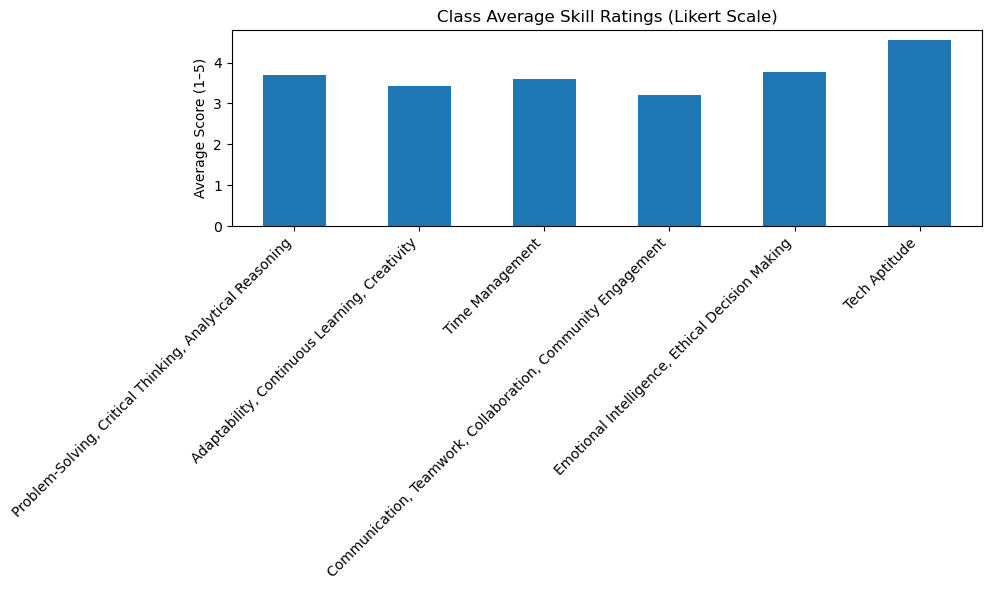

In [13]:
import matplotlib.pyplot as plt

class_avg = likert_df.drop(columns=["Student"]).mean()

plt.figure(figsize=(10, 6))
class_avg.plot(kind='bar')
plt.ylabel("Average Score (1–5)")
plt.title("Class Average Skill Ratings (Likert Scale)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Please enter a student name from this list of names: Alex Rowe, Angel Wai-Hernandez, Ben Dike, Benjamin Brown, Brandon Suarez, Caroline Creary, Isabella Calderon, Ishmael Sillah, Jaheem Beck, Janelle Boateng, Jordan Edwards, Jose Manuel Plata, Kaylee Taye, Keziah Letsa, Logan Passe, Maryama Karimou, Michael Bawuah, Michael Quintero, Nusayba Nizam, Rahib Hoque, Raihan Rafin, Rhyley Morrow, Tochukwu Ugboajah, Yasmin Folarin, Zaire Spencer Janelle Boateng


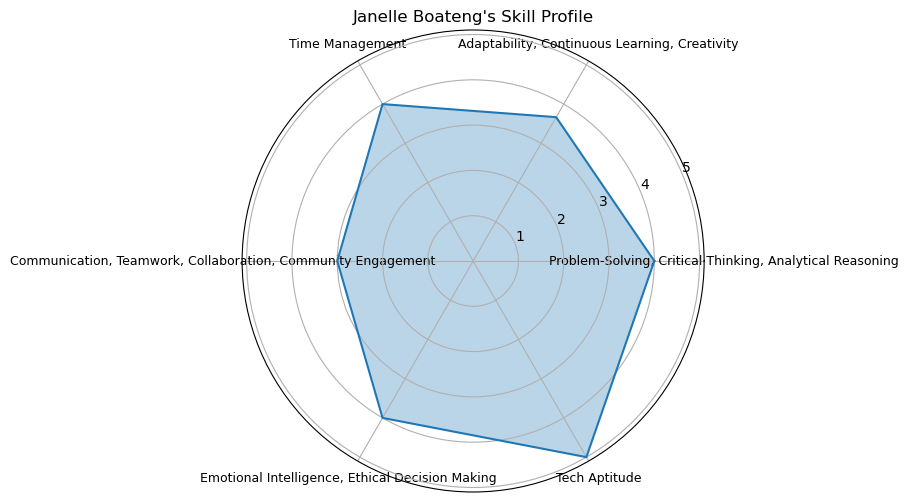

In [25]:
import numpy as np

def plot_radar(df, student_name):
    row = df[df["Student"] == student_name]
    if row.empty:
        print("Student not found")
        return

    values = row.iloc[0, 1:].tolist()
    labels = row.columns[1:]

    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    values += values[:1]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, values)
    ax.fill(angles, values, alpha=0.3)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=9)
    ax.set_yticks([1, 2, 3, 4, 5])
    ax.set_title(f"{student_name}'s Skill Profile")
    plt.show()
unique_values = likert_df['Student'].unique()
mylist=unique_values.tolist()
mylist.sort()
student_names=""
for i in mylist:
    student_names+=i+","+" "
student_names=student_names[0:-2]
# print(student_names)
student_name=input("Please enter a student name from this list of names:"+" "+student_names)
plot_radar(likert_df, student_name)


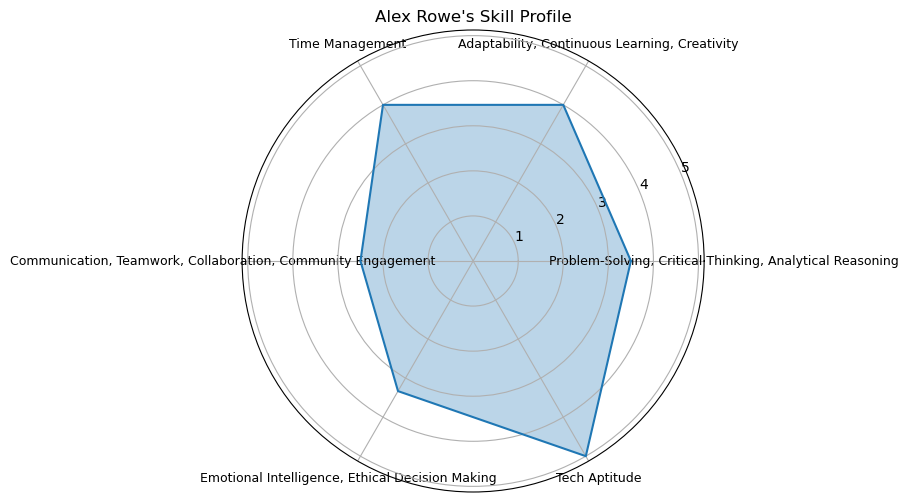

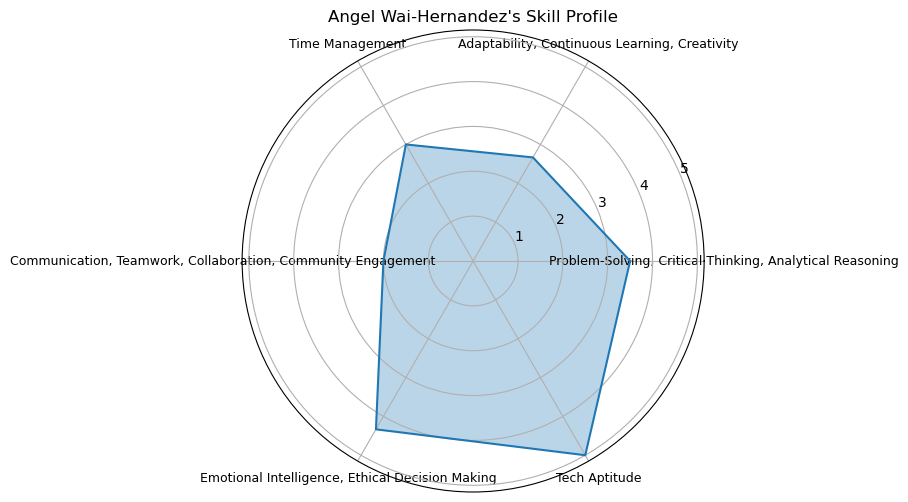

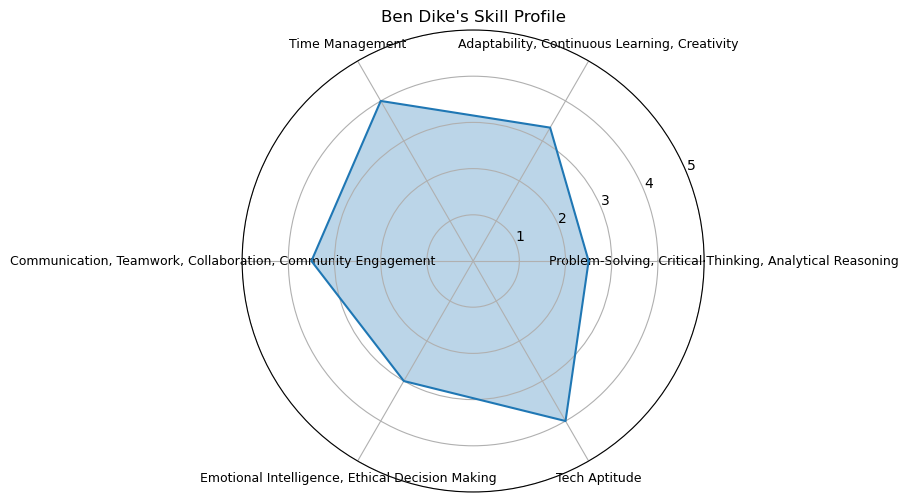

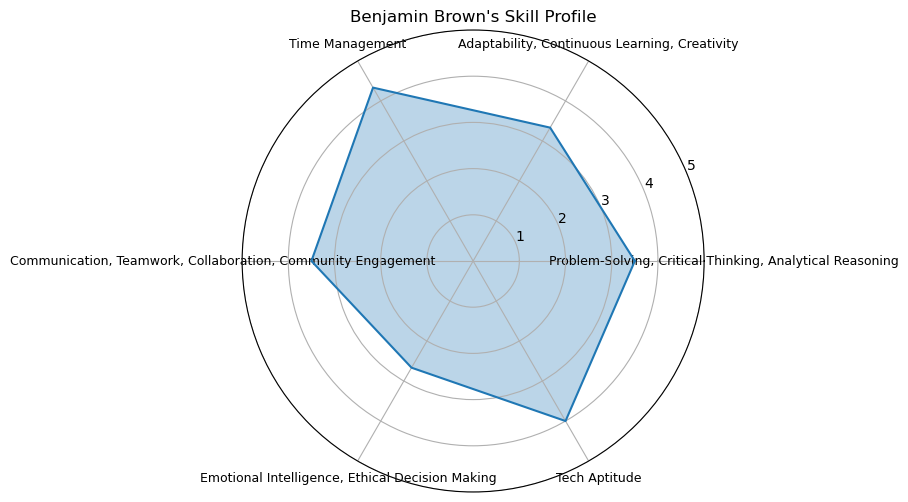

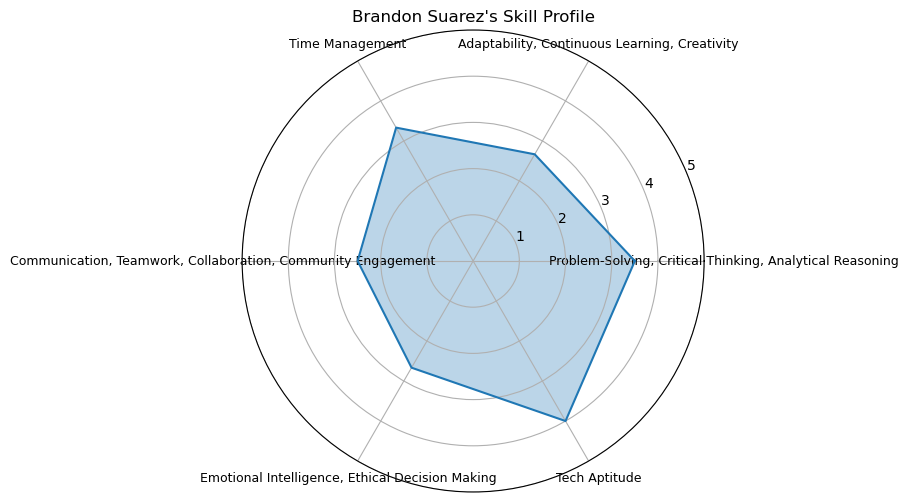

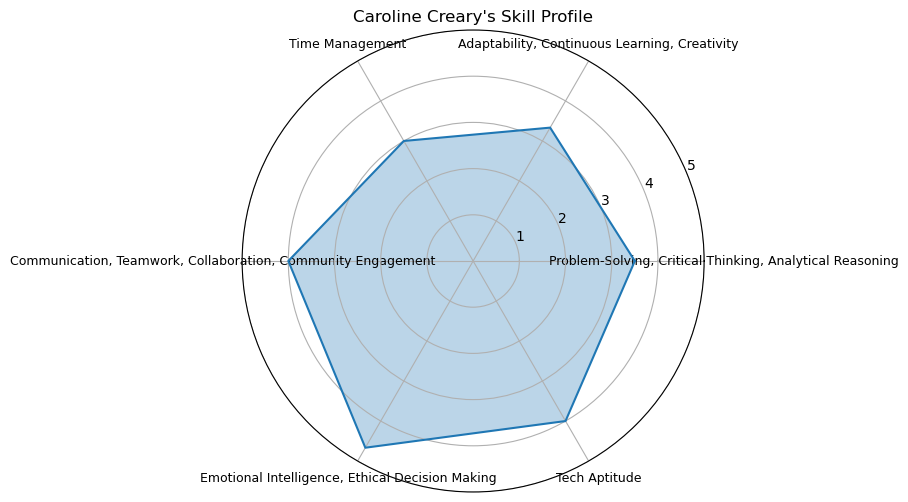

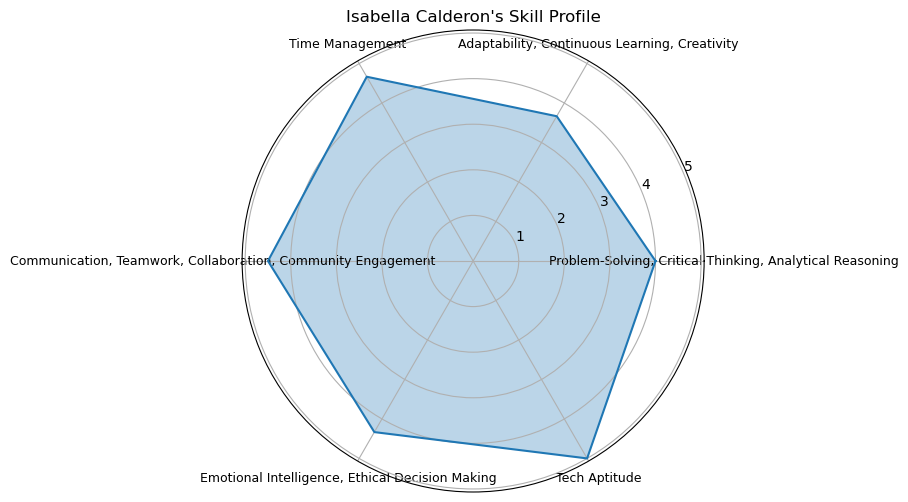

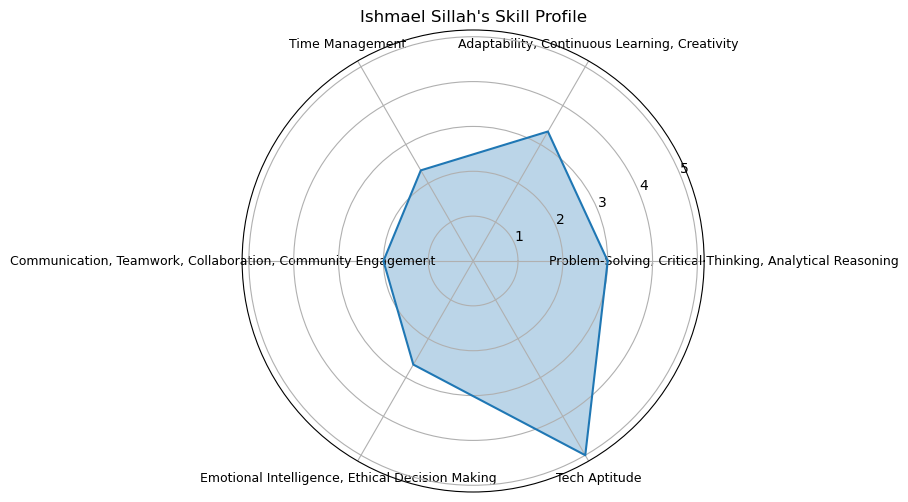

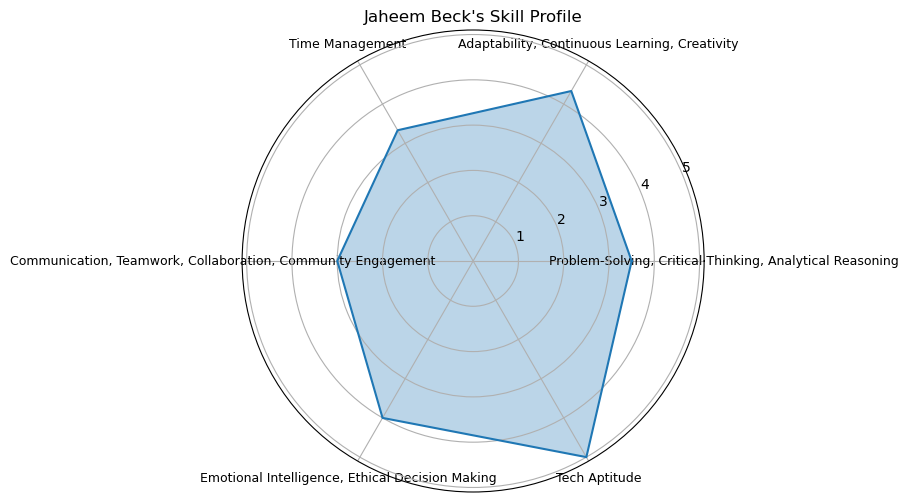

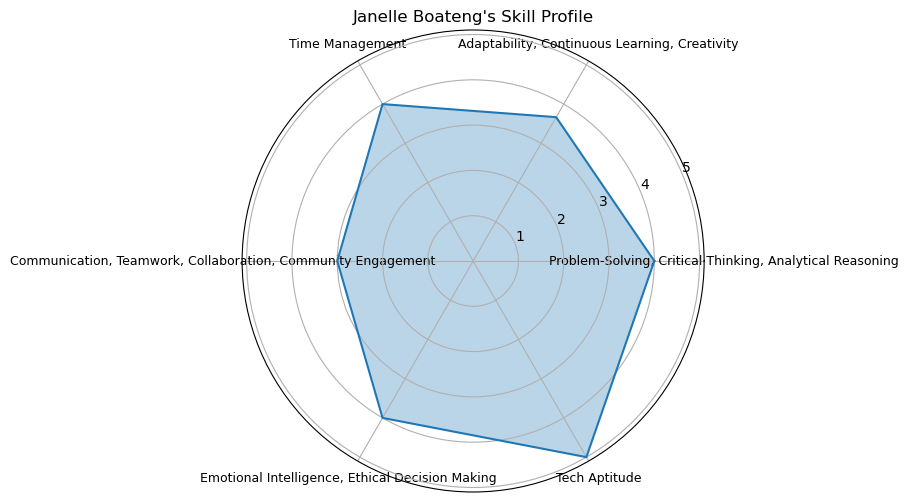

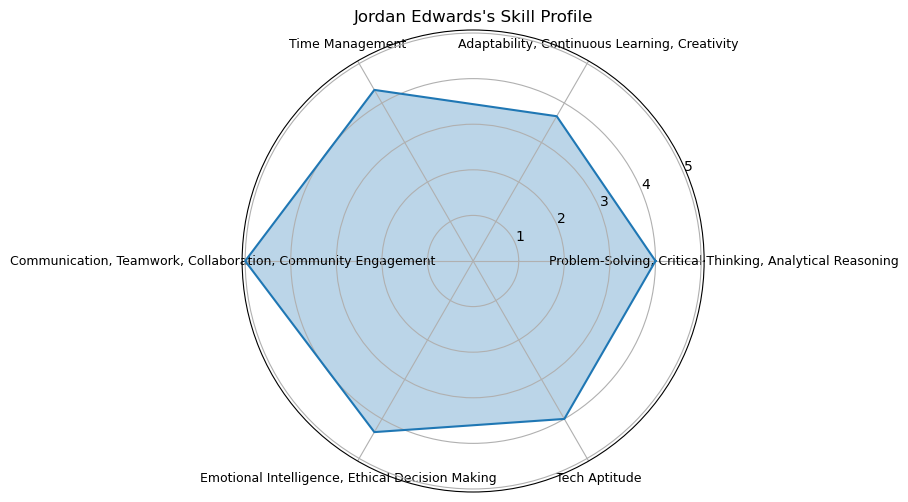

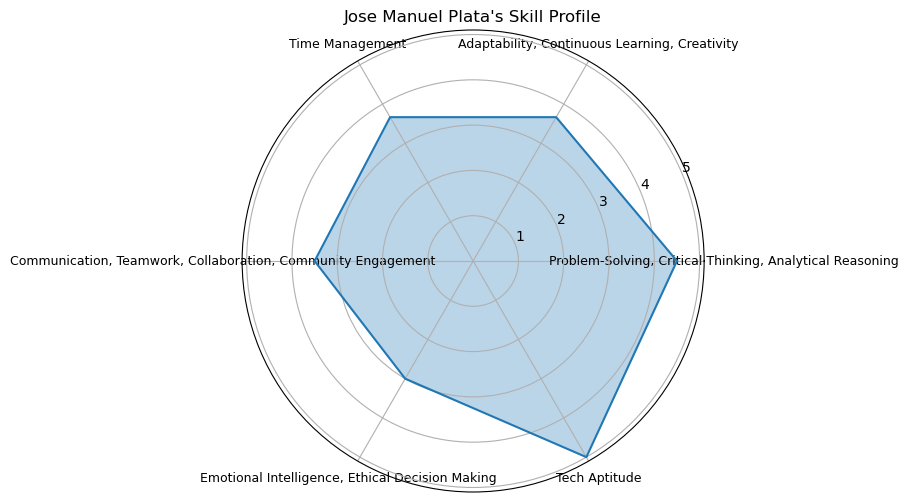

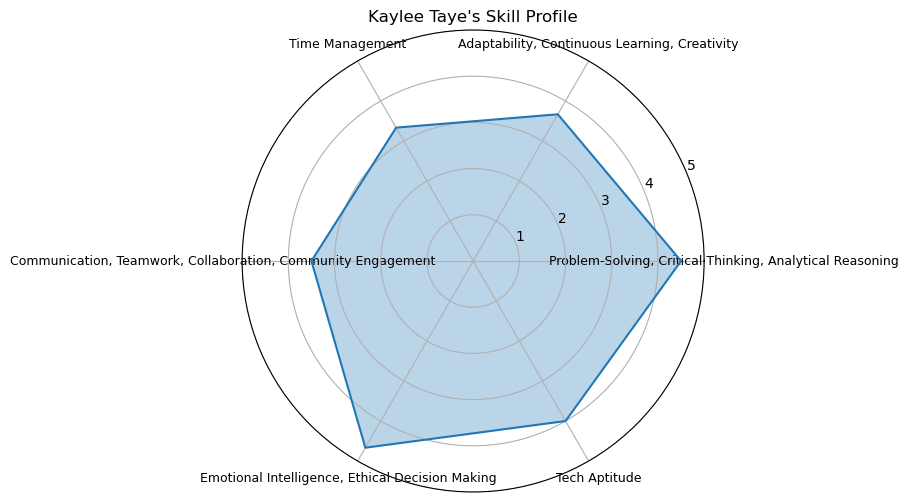

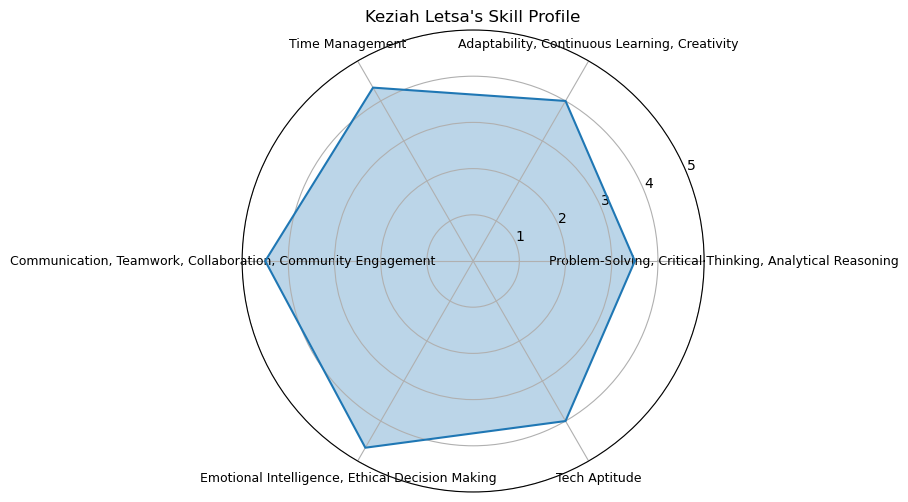

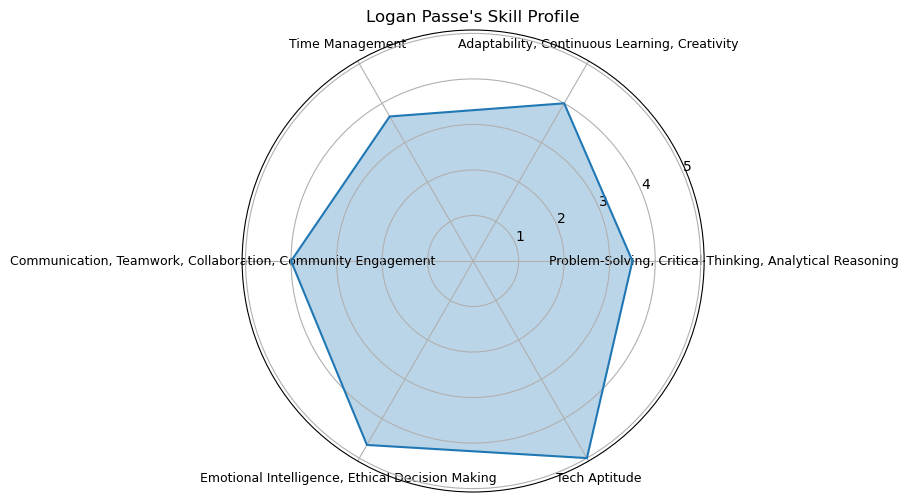

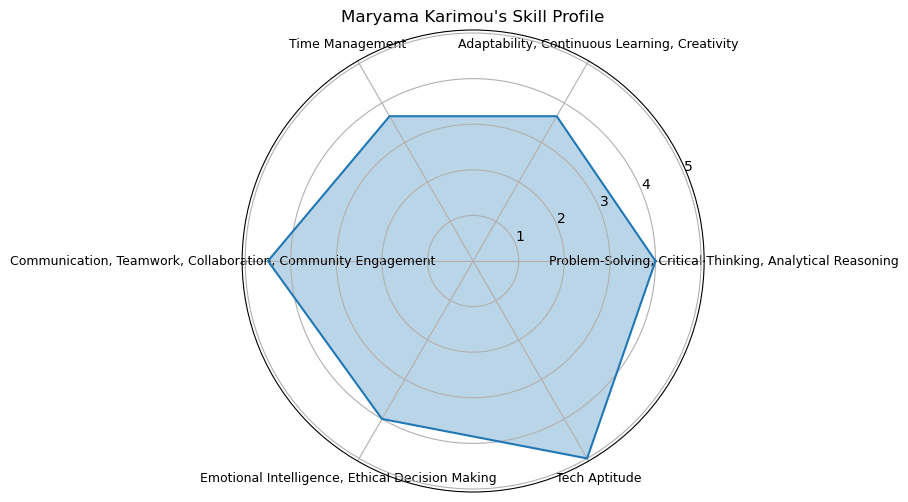

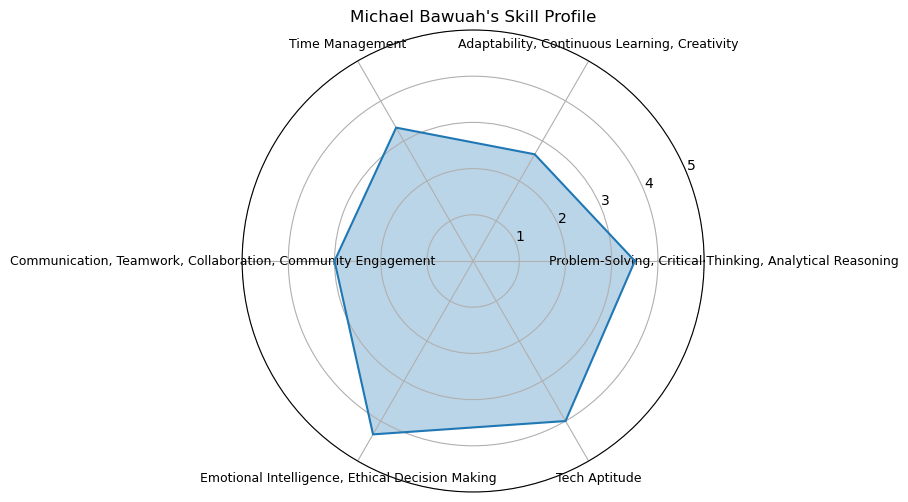

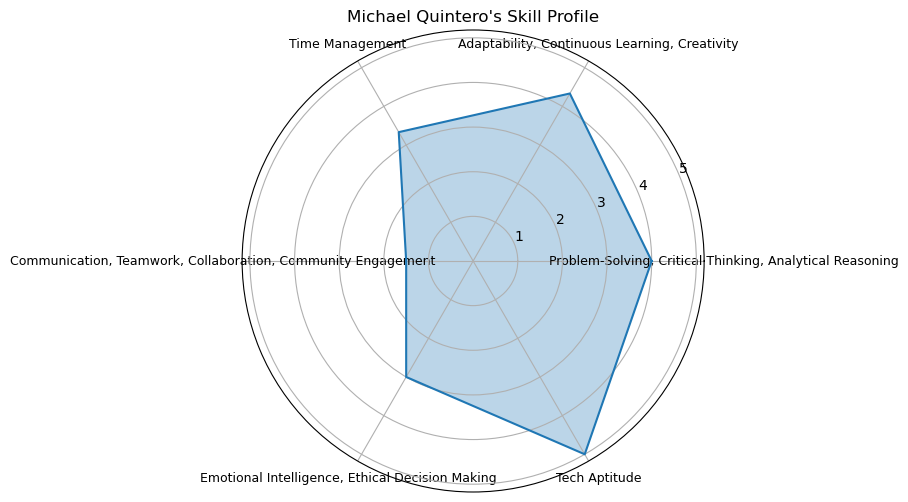

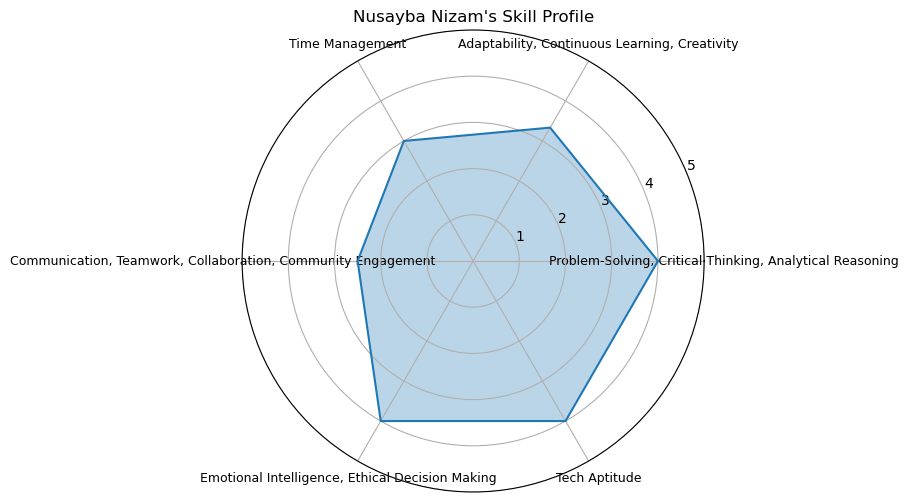

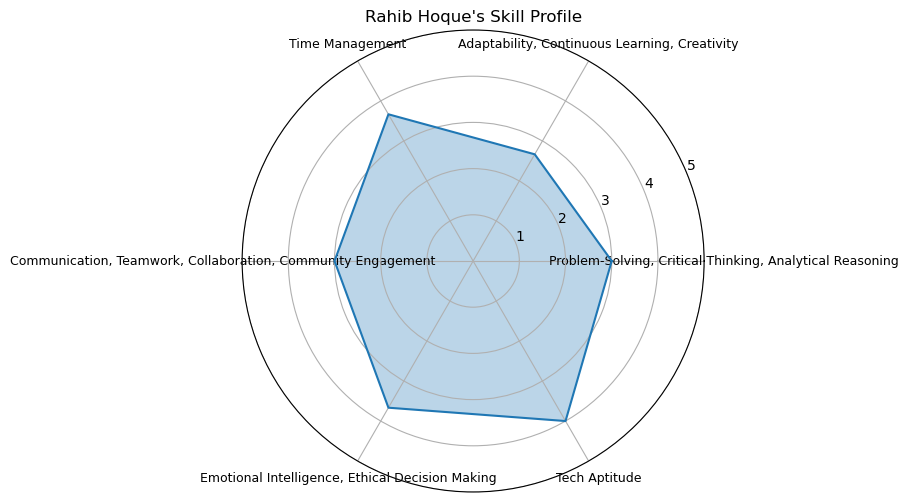

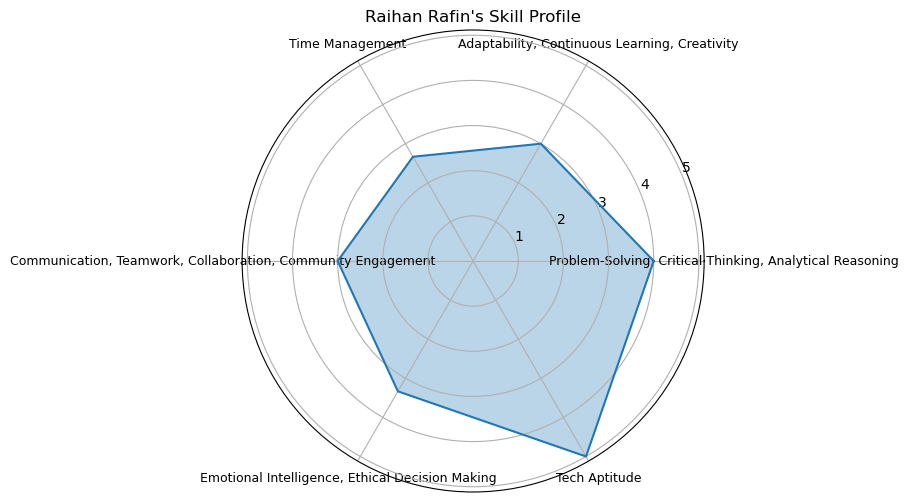

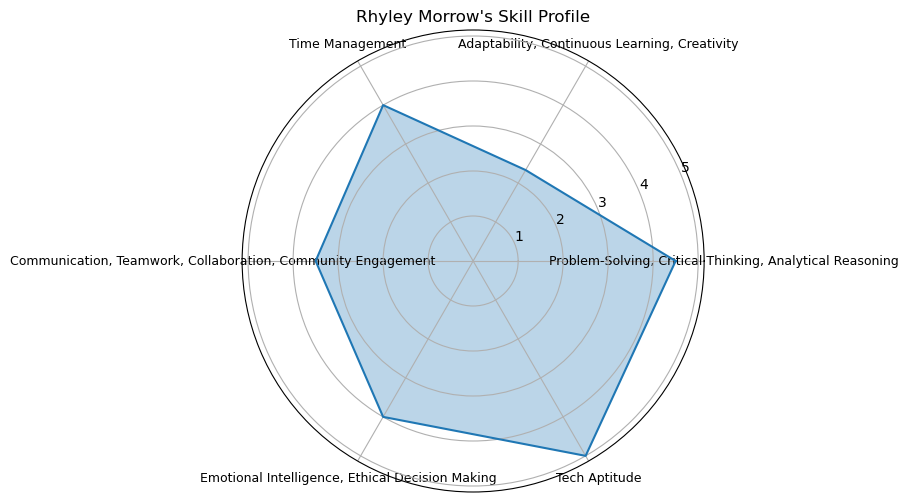

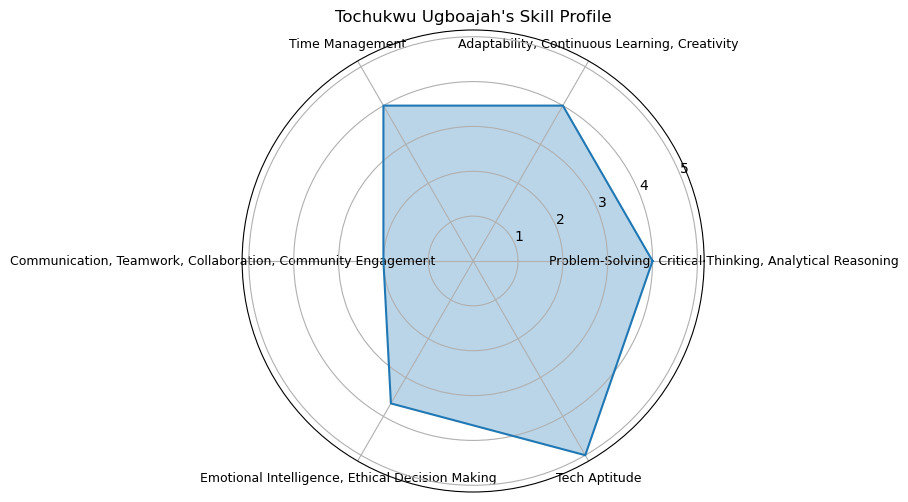

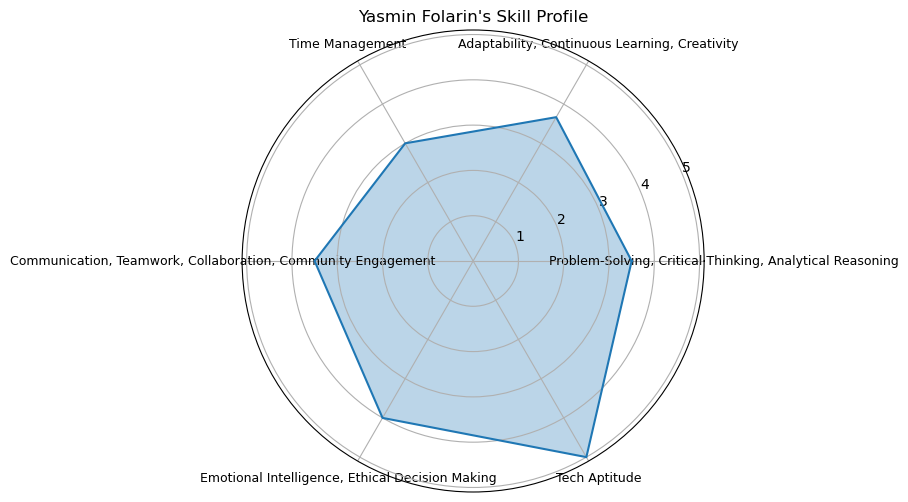

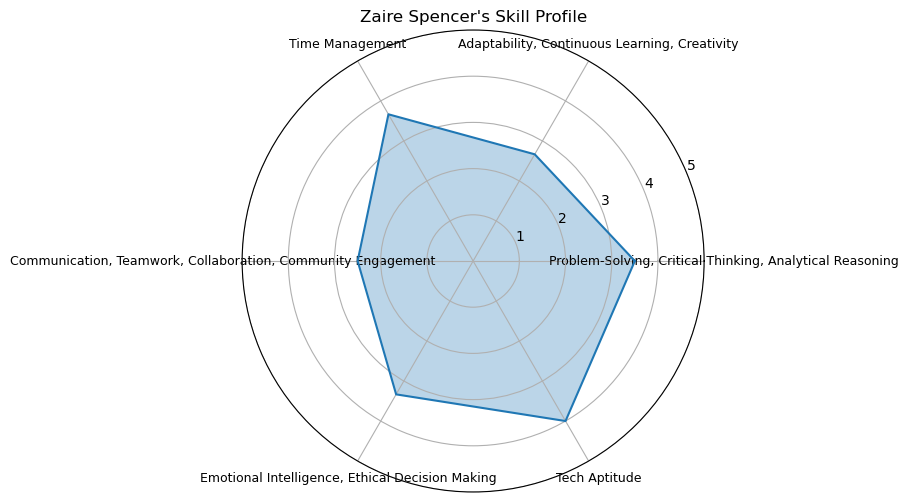

In [26]:
for name in mylist:
    plot_radar(likert_df, name)